# 3. Comparing Classifiers: Divorce

Naive Bayes training accuracy:  0.9852941176470589
Naive Bayes testing accuracy:  0.9411764705882353
Logistic Regressor training accuracy:  1.0
Logistic Regressor testing accuracy:  0.9117647058823529
KNN training accuracy:  0.9852941176470589
KNN testing accuracy:  0.9411764705882353

 Results after PCA:
Naive Bayes training accuracy:  0.9852941176470589
Naive Bayes testing accuracy:  0.9411764705882353
Logistic Regressor training accuracy:  0.9926470588235294
Logistic Regressor testing accuracy:  1.0
KNN training accuracy:  0.9852941176470589
KNN testing accuracy:  0.9411764705882353


Text(0.5, 1.0, 'KNN')

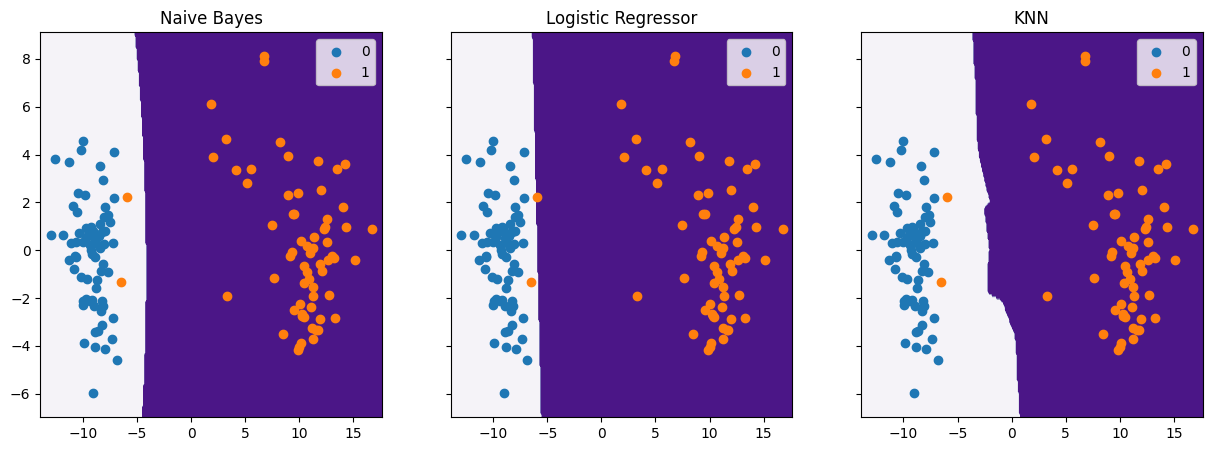

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA




columns = ['x_' + str(i) for i in range(1,55)] + ['label']
X = pd.read_csv('data/marriage.csv', header = None, index_col = False)
X.columns = columns
X, y = X[columns[:-1]], X['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=194)




model = GaussianNB(var_smoothing = 1e-3)
model.fit(X_train, y_train)
print( 'Naive Bayes training accuracy: ', model.score(X_train, y_train))
print( 'Naive Bayes testing accuracy: ', model.score(X_test, y_test))


model = LogisticRegression()
model.fit(X_train, y_train)
print( 'Logistic Regressor training accuracy: ', model.score(X_train, y_train))
print( 'Logistic Regressor testing accuracy: ', model.score(X_test, y_test))

model = KNeighborsClassifier()
model.fit(X_train, y_train)
print( 'KNN training accuracy: ', model.score(X_train, y_train))
print( 'KNN testing accuracy: ', model.score(X_test, y_test))



pca = PCA(n_components = 2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np. meshgrid(np.arange(x_min, x_max, 0.1),
                 np.arange(y_min, y_max, 0.1))
f, pl = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 5))


print("\n Results after PCA:")


model = GaussianNB(var_smoothing = 1e-3)
model.fit(X_train, y_train)
print( 'Naive Bayes training accuracy: ', model.score(X_train, y_train))
print( 'Naive Bayes testing accuracy: ', model.score(X_test, y_test))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pl[0].contourf(xx, yy, Z,cmap='Purples')
for i in range(2):
    pl[0].scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label = str(i))
pl[0].legend()
pl[0].set_title('Naive Bayes')


model = LogisticRegression()
model.fit(X_train, y_train)
print( 'Logistic Regressor training accuracy: ', model.score(X_train, y_train))
print( 'Logistic Regressor testing accuracy: ', model.score(X_test, y_test))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pl[1].contourf(xx, yy, Z,cmap='Purples')
for i in range(2):
    pl[1].scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label = str(i))
pl[1].legend()
pl[1].set_title('Logistic Regressor')


model = KNeighborsClassifier()
model.fit(X_train, y_train)
print( 'KNN training accuracy: ', model.score(X_train, y_train))
print( 'KNN testing accuracy: ', model.score(X_test, y_test))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pl[2].contourf(xx, yy, Z,cmap='Purples')
for i in range(2):
    pl[2].scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label = str(i))
pl[2].legend()
pl[2].set_title('KNN')



